###### In this notebook I attempt to fit my data using a neural network with the keras library. I import my cleaned data, perform a train-test split, make a simple neural network and build my model. Then I compare the predictions of my model with the actual results of my model to see if I can find issues in the predictions.

In [345]:
import pandas as pd
import numpy as np
import nltk
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()


file_path_comments = r'~/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'

#file_path_comments = r'/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [346]:
from sklearn.model_selection import train_test_split
import random
from datetime import datetime

X = clean_comments['commentBody']
y = clean_comments['recommendations']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random.seed(datetime.now()))

In [373]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=3, max_df=0.8, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

In [374]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=500, activation='tanh', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 500)               2500500   
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 501       
Total params: 2,501,001
Trainable params: 2,501,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_onehot, y_train, 
          epochs=10, batch_size=128, verbose=1, 
          validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 3s 90us/step - loss: 16.3137 - acc: 0.1403 - val_loss: 15.4314 - val_acc: 0.1449
Epoch 2/10
32000/32000 [==============================] - 2s 63us/step - loss: 16.0343 - acc: 0.1536 - val_loss: 15.4833 - val_acc: 0.1506
Epoch 3/10
32000/32000 [==============================] - 2s 63us/step - loss: 15.9302 - acc: 0.1686 - val_loss: 15.5309 - val_acc: 0.1446
Epoch 4/10
32000/32000 [==============================] - 2s 63us/step - loss: 15.8593 - acc: 0.1794 - val_loss: 15.5591 - val_acc: 0.1435
Epoch 5/10
20480/32000 [==================>...........] - ETA: 0s - loss: 15.8055 - acc: 0.1904

In [ ]:
scores = model.evaluate(vectorizer.transform(X_test), y_test, verbose=1)
print("Accuracy:", scores[1])  # Accuracy: 0.875

###### Now let's examine the predictions of my model. First I example five sample data points, and then I plot all of my data vs. their predicted values.

In [ ]:
X_train[:5]

In [363]:
prediction = model.predict(vectorizer.transform(X_test))
print((prediction[:5]))

[[6.320229 ]
 [4.6725335]
 [1.2244456]
 [3.2727227]
 [8.16405  ]]


In [364]:
print(y_test.head(5))

12051     2.0
49712    23.0
22502    22.0
36608     3.0
5830      1.0
Name: recommendations, dtype: float64


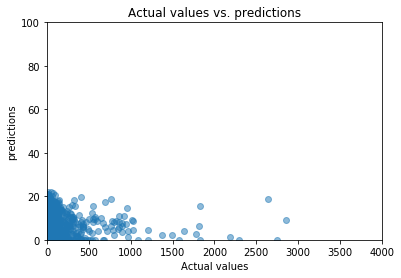

In [365]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(y_test, prediction, alpha=0.5)
plt.title('Actual values vs. predictions')
plt.xlabel('Actual values')
plt.ylabel('predictions')

axes = plt.gca()
axes.set_xlim([0,4000])
axes.set_ylim([0,100])
#axes.set_xscale('log')

plt.show()

In [366]:
y_test.mean()

17.845

In [367]:
prediction.mean()

4.0262084

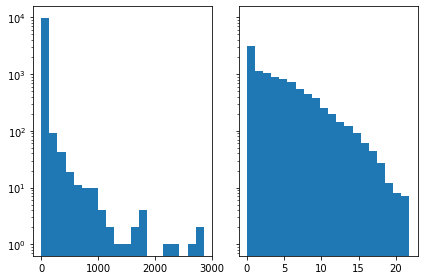

In [368]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = y_test
y = prediction

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[0].set_yscale('log')
axs[1].hist(y, bins=n_bins)
axs[1].set_yscale('log')

It seems that our predictions fall within a narrow range of 0 - 20, while the actual data has a long tail going to ~2500. 